In [79]:
import sys

sys.path.append("..")
import numpy as np
from ipywidgets import interact

from calibration.projector.board import draw_board, gen_checkerboard_grid, gen_charuco_grid
from calibration.projector.projector import Projector

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def f(t1, t2, t3, l1, l2):
    projector = Projector(
        R=np.eye(3), t=np.array([t1, t2, t3]), lambdas=np.array([l1, l2])
    )
    print(
        f"l2: [{-2.61752136752137 * l1 - 6.85141810943093, -2.61752136752137 * l1 - 4.39190876941320}]"
    )
    X = gen_checkerboard_grid(7, 9)
    x = projector.project(X)
    # x1, x2, x = projector.project(X)
    # display(draw_board(x1, "x1"))
    # display(draw_board(x2, "x2"))
    display(draw_board(x, "x"))
    # return draw_board(x, "Board", projector.camera.resolution).update_layout(
    #     width=700, height=700
    # )

In [82]:
gen_checkerboard_grid(7, 9).dtype, gen_charuco_grid(7, 9, 0.4, 0.2).dtype is np.float64

(dtype('float64'), False)

In [78]:
gen_checkerboard_grid(7, 9).dtype

dtype('float64')

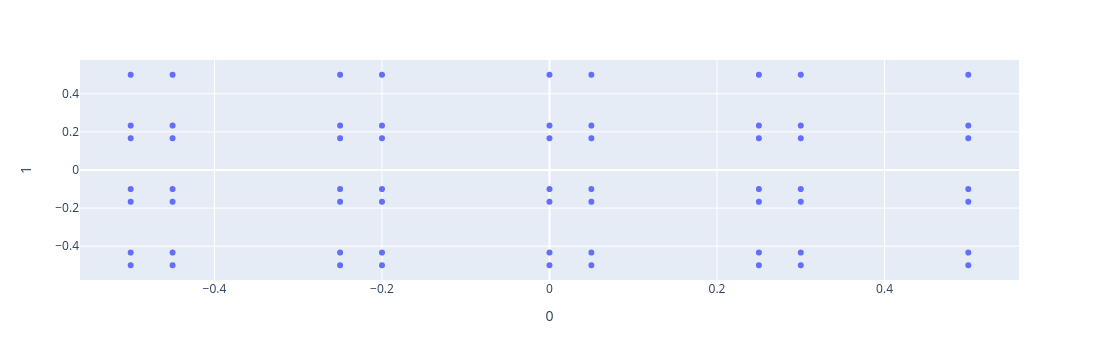

In [80]:
px.scatter(gen_charuco_grid(7, 9, 0.2), x=0, y=1)

In [60]:
interact(
    f,
    t1=(-0.3, 0.3),
    t2=(-0.3, 0.3),
    t3=(-0.5, -0.01, 0.01),
    l1=(-1.5, 1.5),
    l2=(-10, 0.2),
);

interactive(children=(FloatSlider(value=0.0, description='t1', max=0.3, min=-0.3), FloatSlider(value=0.0, desc…

In [73]:
rez = []


for t1 in np.arange(-0.1, 0.11, 0.1):
    for t2 in np.arange(-0.1, 0.11, 0.1):
        for t3 in np.arange(-0.4, -0.01, 0.1):
            for l1 in np.arange(-.5, 0.01, 0.03):
                # for l2 in [0]:

                for l2 in np.arange(
                    -2.61752136752137 * l1 - 6.85141810943093,
                    -2.61752136752137 * l1 - 4.39190876941320,
                    0.1,
                ):
                    l2 = 0
                    t = np.array([t1, t2, t3])
                    lambdas = np.array([l1, l2])

                    key = [*t, *lambdas]
                    proj = Projector(R=np.eye(3), t=t, lambdas=lambdas)
                    X = gen_checkerboard_grid(7, 9)
                    try:
                        x = proj.project(X)

                        if (x > 0).all and (x < proj.camera.resolution).all():
                            rez.append(key + [0])
                        else:
                            rez.append(key + [1])

                    except ValueError as e:
                        assert str(e) == "f(a) and f(b) must have different signs", str(
                            e
                        )
                        # self.fail(f"Value error for {t=}, {lambdas=}")
                        rez.append(key + [2])

In [74]:
import pandas as pd
import plotly.express as px

In [75]:
df = pd.DataFrame(data=rez, columns=["t1", "t2", "t3", "l1", "l2", "rez"])

In [76]:
df.describe()

t1            t2            t3            l1       l2   
count  1.530000e+04  1.530000e+04  15300.000000  15300.000000  15300.0  \
mean  -3.715256e-18 -3.715256e-18     -0.250000     -0.260000      0.0   
std    8.165233e-02  8.165233e-02      0.111807      0.146974      0.0   
min   -1.000000e-01 -1.000000e-01     -0.400000     -0.500000      0.0   
25%   -1.000000e-01 -1.000000e-01     -0.325000     -0.380000      0.0   
50%    0.000000e+00  0.000000e+00     -0.250000     -0.260000      0.0   
75%    1.000000e-01  1.000000e-01     -0.175000     -0.140000      0.0   
max    1.000000e-01  1.000000e-01     -0.100000     -0.020000      0.0   

           rez  
count  15300.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

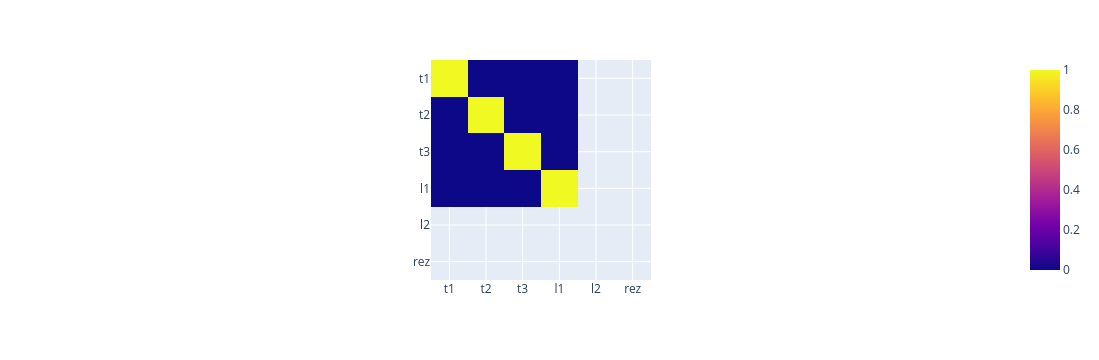

In [77]:
px.imshow(df.corr())

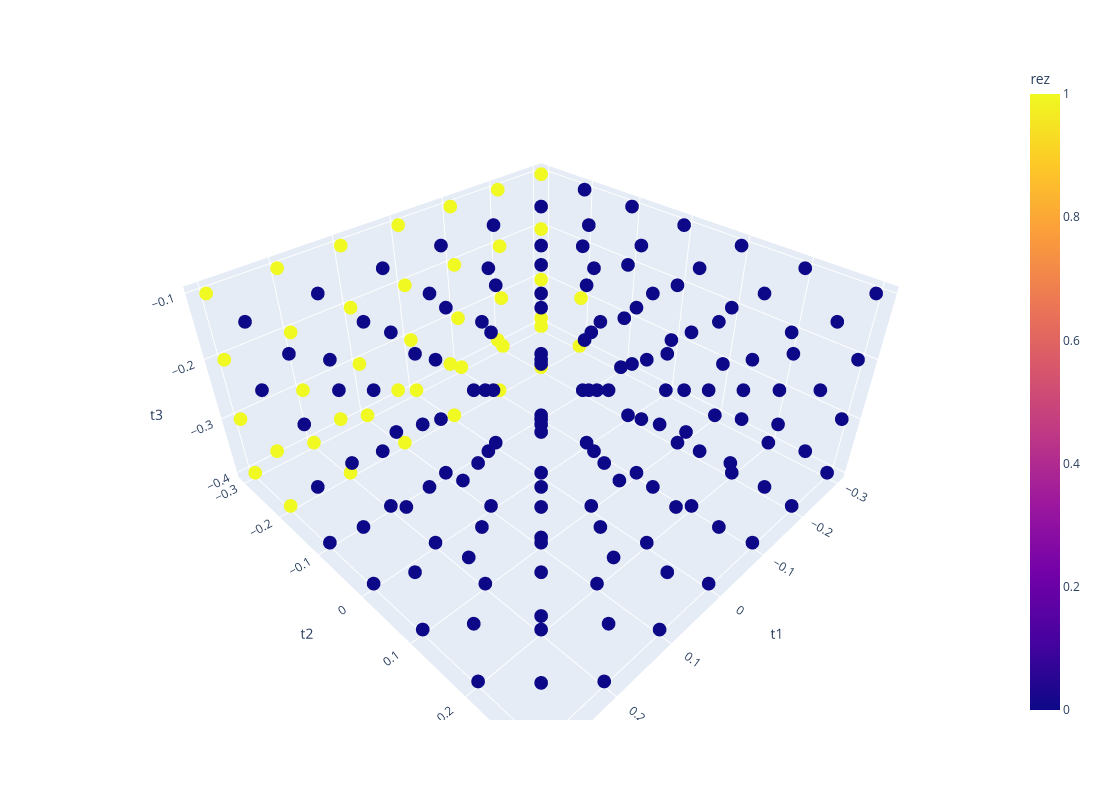

In [67]:
px.scatter_3d(df, x='t1', y='t2', z='t3', color='rez', height=800)